![image.png](https://i.imgur.com/a3uAqnb.png)

# 🧬 Bio Data — Understanding Biological Information Flow

Welcome to your bioinformatics journey! This guide will introduce you to the fundamental concepts and data formats you'll encounter in computational biology.

## 🎯 The Central Dogma of Molecular Biology

**Core Principle:** Information flows from DNA → RNA → Protein

- **DNA** stores genetic information
- **RNA** serves as the working copy
- **Proteins** perform cellular functions

This flow represents how cells convert genetic instructions into functional molecules.

---

## 🧬 DNA (Deoxyribonucleic Acid)

### Basic Properties
- **Alphabet:** Four nucleotides - A, C, G, T
- **Structure:** Double-stranded with complementary base pairing
  - A pairs with T
  - C pairs with G

---

## 🧪 RNA (Ribonucleic Acid)

### Key Differences from DNA
- **Alphabet:** A, C, G, U (Uracil replaces Thymine)
- **Structure:** Single-stranded
- **Function:** Messenger RNA (mRNA) carries genetic information from DNA to protein synthesis machinery

  
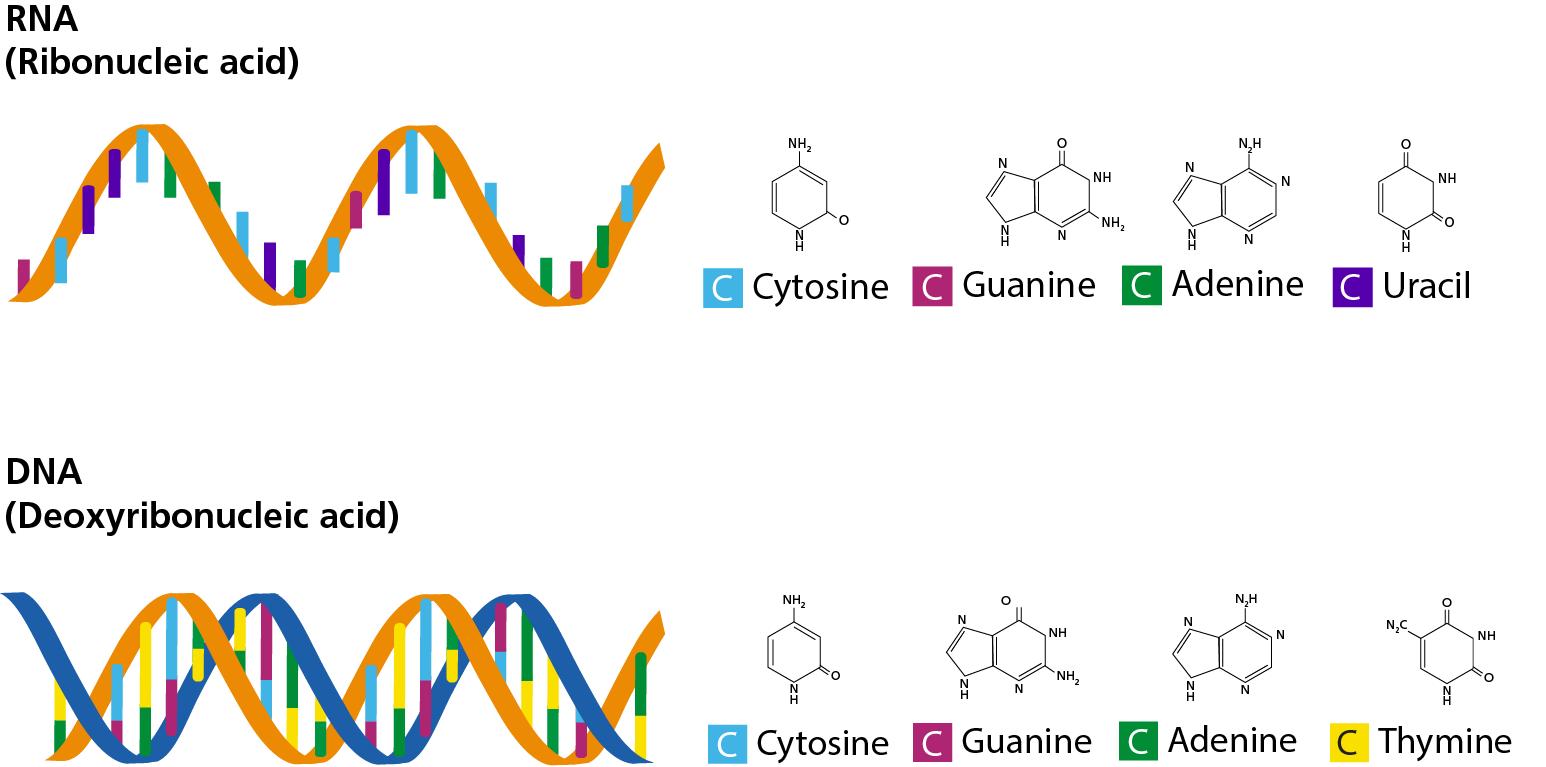

---

## 🔬 Proteins

### Structure Hierarchy
1. **Primary:** Linear amino acid sequence
2. **Secondary:** Local folding patterns (α-helices, β-sheets)
3. **Tertiary:** Complete 3D structure
4. **Quaternary:** Multi-protein complexes

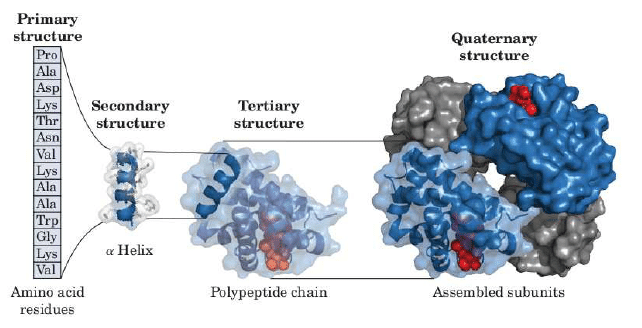

### The Genetic Code
- **Translation:** Groups of 3 RNA bases (codons) specify amino acids
- **Alphabet:** 20 standard amino acids with single-letter codes
- **Example:** AUG codes for Methionine (M), the start codon

---

## 📝 Practical Example: From Gene to Protein

### Sample DNA Sequence (FASTA format)
```
>TP53_example_gene
ATGGAGGAGCCGCAGTCAGATCCTAGCG...
```

### Transcription Process
**DNA:** `ATGGAGGAGCCGCAG...`  
**RNA:** `AUGGAGGAGCCGCAG...` (T → U substitution)

### Translation Process
**Codons:** `AUG | GAG | GAG | CCG | CAG | ...`  
**Protein:** `M - E - E - P - Q - ...`

---

## 📊 Essential File Formats for Bioinformatics

| Format | Content | Bioinformatics Applications | Key Features |
|--------|---------|----------------------------|--------------|
| **FASTA** | DNA/RNA/Protein sequences | Reference genomes, sequence alignment | Simple header + sequence format |
| **FASTQ** | Raw sequencing reads + quality scores | Quality control, variant calling | Includes per-base quality information |
| **PDB/mmCIF** | 3D protein structures | Structure analysis, drug discovery | Atomic coordinates and metadata |
| **GTF/GFF** | Gene annotations | Genome browsers, RNA-seq analysis | Feature locations and attributes |
| **VCF** | Genetic variants | GWAS, population genetics | Standardized variant representation |
| **Expression matrices** | Gene expression data | Differential expression, clustering | Genes × samples data tables |

### FASTA = Plain Text Files
```
>gene_name_v1.0
ATGCGTACGATCG...
```
- Like a `.txt` file with a header
- Simple, human-readable
- Good for reference data

### FASTQ = JSON with Metadata
```
@read_identifier
ATGCGTACGATCG...
+
!"#$%&'()*+,-
```
- Like FASTA but with quality scores
- Each symbol represents confidence (like probability scores)
- Raw data from sequencing machines (think: sensor data with noise levels)
- Quality scores represent confidence that the sequencing machine correctly identified each individual base.


### PDB = 3D Model Files
- Like `.obj` or `.fbx` files for 3D models
- Contains coordinates of every atom in a protein
- Used for visualizing molecular structures 


## The Sequencing Process

When a sequencing machine reads DNA, it's essentially doing **optical character recognition (OCR)** on molecular signals:

1. **DNA fragment** passes through the machine
2. **Each base (A,T,G,C)** emits a light signal or electrical signal
3. **Machine's camera/sensor** detects these signals
4. **Software algorithm** converts signals → base calls

## The Problem: Signal Ambiguity

```
Strong signal:  ████████  → "Definitely a G" → Quality = 40 (99.99% confident)
Weak signal:    ██░░░░░░  → "Probably a G?" → Quality = 20 (99% confident)  
Messy signal:   ░█░░█░░░  → "Could be G or C" → Quality = 10 (90% confident)
```

## Real Example from FASTQ

```
@read_001
ATCGATCGATCG
+
IIIIIIIIII#!
```

**Quality interpretation:**
- `I` = Quality ~40 = 99.99% confident this base is correct
- `#` = Quality ~2 = Only ~37% confident (very uncertain!)
- `!` = Quality ~0 = Basically a random guess

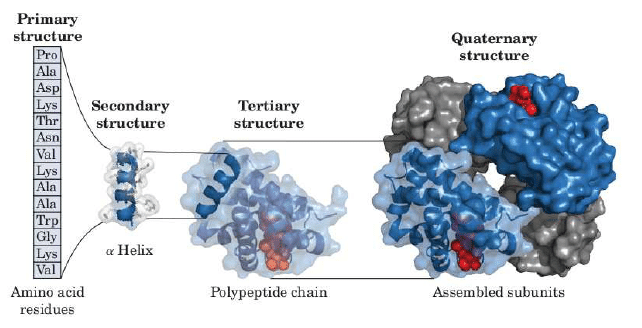
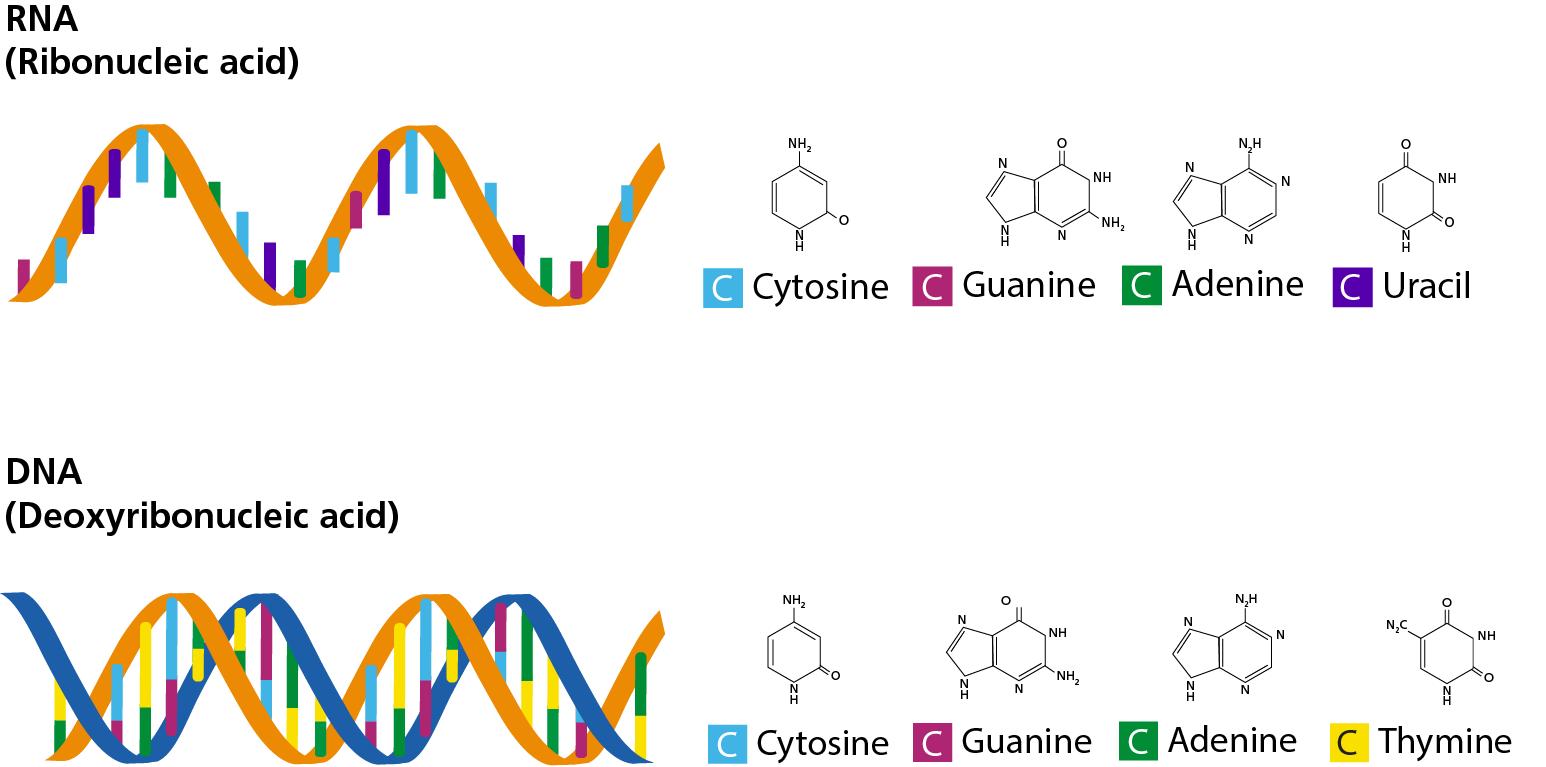

In [1]:
# Optional helpers used below
!pip install -q anndata rdkit-pypi pydicom biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 46.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 67.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.4/255.4 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 79.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.2 MB/s eta 0:00:00


## Data Representations You Must Recognise

**1) Sequences**
- **Files:** FASTA (reference), FASTQ (reads + quality)
- **Encodings:** one-hot (A/C/G/T or 20 AAs), k-mer counts / TF-IDF, transformer tokenisation (AA or nucleotide subwords)
- **Why it matters:** turns strings into tensors; k-mers capture local motifs; tokens enable LMs
- **Where you’ll see it:** GenBank/ENA reads, UniProt proteins, RNA-seq pipelines


**FASTA example**

![image.png](https://i.imgur.com/bpfPefh.png)

```python
TP53|NM_000546.6 Homo sapiens tumor protein p53 (TP53), mRNA
ATGGAGGAGCCGCAGTCAGATCCTAGCGTCCGAG...
```

**FASTQ example (4-line record)**

![image.png](https://i.imgur.com/QArb9ld.png)


```python
@M00001:1:000000000-AAAAA:1:1101:10000:10000 1:N:0:1 
ACCTGAGATCTGACGTA...
+
FFFEEEDDCCBBBBAAA...  (Quality)
```

#### **How can we handle these sequences in code?**

#### Let's consider n_grams (called k-mers in bio) instead of only 1-gram.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
seqs = ["ACGTACGT", "ACGTACGA"]
v = TfidfVectorizer(analyzer="char", ngram_range=(3,3))   # ---> 3-mers
X = v.fit_transform(seqs)
v.get_feature_names_out()[:6], X.toarray()

(array(['acg', 'cga', 'cgt', 'gta', 'tac'], dtype=object),
 array([[0.63245553, 0.        , 0.63245553, 0.31622777, 0.31622777],
        [0.66758217, 0.46913173, 0.33379109, 0.33379109, 0.33379109]]))

#### We can train a ML model to classify sequences based on this representation 👀👀
#### Or maybe we can tokenize the sequences and use a transformer 👀👀

In [3]:
import numpy as np

alphabet = "ACGT"
lookup = {c: i for i, c in enumerate(alphabet)}

# If you have multiple sequences:
seqs = ["ACGTAC", "TGCATG"]
batch = np.stack([
    np.eye(len(alphabet), dtype=np.uint8)[[lookup[b] for b in s]]
    for s in seqs
])
print("With batch=2:", batch.shape)  # (2, 6, 4)

        # ---> Can be intepreted as (batch_size, length of seq, features)
        # ---> Same as NLP sequences!!

With batch=2: (2, 6, 4)


#### Possible AI Tasks

**Classification Tasks:**
- **Gene/Non-gene classification** - Predict if a DNA sequence contains a gene
- **Promoter prediction** - Identify regulatory regions that initiate transcription
- **Splice site prediction** - Find where introns are removed from pre-mRNA
- **Protein family classification** - Classify proteins into functional families
- **Subcellular localization** - Predict where in the cell a protein will go
- **Antimicrobial peptide prediction** - Identify peptides that kill bacteria/viruses

**Regression Tasks:**
- **Transcription factor binding prediction** - Predict binding strength to DNA sequences
- **Gene expression prediction** - Predict mRNA levels from DNA sequence features
- **Protein stability prediction** - Predict how stable a protein fold will be
- **Binding affinity prediction** - Predict how strongly two molecules will bind

**Generation Tasks:**
- **Sequence design** - Generate new DNA/protein sequences with desired properties
- **Protein evolution** - Generate evolutionary variants of existing proteins
- **Codon optimization** - Redesign gene sequences for better expression in target organisms

**Representation Learning:**
- **Sequence embeddings** - Learn dense vector representations of biological sequences
- **Motif discovery** - Find recurring patterns in sets of sequences
- **Homology detection** - Find evolutionarily related sequences


### 2) Images

**Files:** TIFF / OME-TIFF (microscopy), DICOM (radiology), JPEG/PNG after pre-processing  
**Why it matters:** pixel/voxel arrays for CNNs; metadata (magnification, modality) is crucial  
**Where you'll see it:** H&E histology tiles, fluorescence microscopy, CT/MRI

TIFF:
![image.png](https://i.imgur.com/RUdrUA0.jpeg)

DICOM:
![image.png](https://i.imgur.com/piWXWPr.png)

In [4]:
!wget https://www.rubomedical.com/dicom_files/dicom_viewer_0003.zip -q
!unzip dicom_viewer_0003.zip

import requests
from io import BytesIO
from PIL import Image
import pydicom

# ---------- Read DICOM ----------
ds = pydicom.dcmread("0003.DCM")
print("DICOM:", ds.Modality, ds.Rows, ds.Columns)

Archive:  dicom_viewer_0003.zip
 extracting: 0003.DCM                
DICOM: XA 512 512


The `Modality` attribute in a DICOM file indicates the imaging modality, i.e., the type of equipment or method used to generate the image. Common modalities include:

- **CT** – Computed Tomography (X-ray cross-sectional imaging)
- **MR** – Magnetic Resonance (magnetic field & radio waves)
- **US** – Ultrasound (soundwave imaging)
- **OT** – Other (unspecified)
- **DX** – Digital Radiography (standard X-ray)
- **CR** – Computed Radiography (X-ray with digital plates)
- **NM** – Nuclear Medicine (radiotracers for functional imaging)
- **PT** – PET (Positron Emission Tomography)
- **XA** – X-Ray Angiography (vascular imaging)
- **RF** – Radio Fluoroscopy (moving X-ray guidance)
- **MG** – Mammography
- **XA** – (again) often used for angiograms
- **DX** – Digital X-ray

#### We can train a CNN-based models on these images to do classification / detection / segmentation 👀

#### Possible AI Tasks
**Segmentation Tasks:**
- **Cell segmentation** - Outline individual cells in microscopy images
- **Nuclei segmentation** - Identify and separate cell nuclei
- **Organ segmentation** - Segment organs in medical scans (liver, brain, etc.)
- **Tumor segmentation** - Identify cancerous regions in medical images
- **Vessel segmentation** - Trace blood vessels or neural networks

**Classification Tasks:**
- **Cancer diagnosis** - Classify tissue images as malignant/benign
- **Cell type classification** - Identify different cell types from morphology
- **Disease classification** - Diagnose diseases from X-rays, CT scans, MRI
- **Drug response prediction** - Predict how cells respond to treatments from images
- **Pathology grading** - Grade severity of diseases from histological images

**Detection Tasks:**
- **Mitosis detection** - Find dividing cells in time-lapse microscopy
- **Anomaly detection** - Identify unusual patterns in medical images
- **Organelle detection** - Locate specific cellular structures
- **Lesion detection** - Find abnormal areas in medical scans

**Quantification Tasks:**
- **Cell counting** - Count cells or specific features in images
- **Morphology analysis** - Measure cell shapes, sizes, and other properties
- **Intensity quantification** - Measure fluorescence or staining intensity
- **Tracking** - Follow cells or objects over time in video microscopy

### 3) Graphs & SMILES (Chemoinformatics)

**Strings:** SMILES for molecules  
**Graphs:** atoms = nodes, bonds = edges; per-node/edge features  
**Why it matters:** GNNs operate directly on molecular structure  
**Where you'll see it:** docking, QSAR, property prediction

#### SMILES example (aspirin)
```
CC(=O)OC1=CC=CC=C1C(=O)O
```


In [5]:
#### Adjacency matrix from SMILES (RDKit)
# Requires: pip install rdkit-pypi
from rdkit import Chem
from rdkit.Chem import rdmolops

mol = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
A = rdmolops.GetAdjacencyMatrix(mol)
mol.GetNumAtoms(), mol.GetNumBonds(), A.shape   # (n_atoms, n_bonds, (n,n))

(13, 13, (13, 13))

#### Adjacency Matrix? so it is represented as a graph?👀 I can use Graph-Neural-Networks on this!

#### Possible AI Tasks

**Property Prediction:**
- **ADMET prediction** - Predict drug absorption, distribution, metabolism, excretion, toxicity
- **Solubility prediction** - Predict how well molecules dissolve in solvents
- **Bioactivity prediction** - Predict biological activity against target proteins
- **Toxicity prediction** - Predict if molecules are harmful to cells/organisms
- **Synthetic accessibility** - Predict how easy a molecule is to synthesize

**Classification Tasks:**
- **Drug classification** - Classify molecules by therapeutic class or mechanism
- **Mutagenicity prediction** - Predict if molecules cause genetic mutations
- **Blood-brain barrier permeability** - Predict if drugs can reach the brain
- **Protein-ligand binding classification** - Predict if molecules bind to proteins

**Generation Tasks:**
- **De novo drug design** - Generate new molecules with desired properties
- **Lead optimization** - Modify existing drugs to improve properties
- **Scaffold hopping** - Generate molecules with similar activity but different structures
- **Reaction prediction** - Predict products of chemical reactions
- **Retrosynthesis** - Predict synthetic routes to make target molecules

**Graph Analysis:**
- **Molecular similarity** - Find molecules with similar structures or properties
- **Pharmacophore identification** - Find key structural features for activity
- **Fragment-based design** - Combine molecular fragments to design new drugs

### 4) 3-D Coordinates / Contact Maps

**Files:** PDB / mmCIF (atomic coordinates), voxelised grids, distance/contact maps  
**Why it matters:** geometry → structure models, diffusion, 3-D GNNs  
**Where you'll see it:** protein folding, protein–ligand binding, structural biology

#### What PDB table looks like

![image.png](https://i.imgur.com/YJuaG4o.png)

![image.png](https://i.imgur.com/Sar08gv.png)

In [6]:
# Downloading and parsing sample PDB (1TSR)
import os
import urllib.request
from Bio.PDB import PDBParser

pdb_id = "1TSR"
pdb_file = f"{pdb_id}.pdb"

# Download PDB file (RCSB repository)
url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
urllib.request.urlretrieve(url, pdb_file)

# Parse downloaded PDB
p = PDBParser(QUIET=True)
structure = p.get_structure(pdb_id, pdb_file)

# list chains and first few atoms
for model in structure:
    print("Model ID:", model.id)
    for chain in model:
        print(" Chain:", chain.id, "| first 3 residue names:",
              [res.resname for res in list(chain)[:3]])

Model ID: 0
 Chain: E | first 3 residue names: ['DT', 'DT', 'DT']
 Chain: F | first 3 residue names: ['DA', 'DT', 'DA']
 Chain: A | first 3 residue names: ['SER', 'SER', 'SER']
 Chain: B | first 3 residue names: ['SER', 'VAL', 'PRO']
 Chain: C | first 3 residue names: ['SER', 'SER', 'VAL']


#### Possible AI Tasks

**Structure Prediction:**
- **Protein folding** - Predict 3D structure from amino acid sequence (have you heard about AlphaFold?)
- **RNA structure prediction** - Predict secondary and tertiary RNA structures  
- **Protein-protein docking** - Predict how proteins interact in 3D
- **Protein-ligand docking** - Predict how small molecules bind to proteins
- **Conformational sampling** - Generate multiple possible 3D conformations

**Function Prediction:**
- **Active site prediction** - Identify functional regions in protein structures
- **Binding site prediction** - Find where ligands bind to proteins
- **Allosteric site prediction** - Identify sites that regulate protein function
- **Protein function annotation** - Predict function from 3D structure
- **Catalytic mechanism prediction** - Predict how enzymes perform reactions

**Design Tasks:**
- **Protein design** - Design new proteins with desired 3D structures
- **Enzyme design** - Create proteins that catalyze specific reactions
- **Protein-protein interface design** - Design proteins that bind specific targets
- **Stability engineering** - Modify proteins to be more stable or active

**Analysis Tasks:**
- **Structural alignment** - Compare 3D structures to find similarities
- **Motion prediction** - Predict how proteins move and flex
- **Mutation effect prediction** - Predict how amino acid changes affect structure/function
- **Drug resistance prediction** - Predict how mutations affect drug binding
- **Contact prediction** - Predict which amino acids are close in 3D space

# Bio Databases

### 📥 Where do we get real bio data?

You’ve seen the data **types** (sequences, images, graphs, 3-D).  
Now: **where** do we pull them from, and what Python tools make it painless?


| Library                | Database                      | Scale (count)                                                                                                                                                                               | What you can fetch                                                                                      |
| ---------------------- | ----------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Biopython**          | **NCBI GenBank**              | **5.68 billion** sequence records; **44.02 trillion** bases (Release 266, Apr 25 2025). ([NCBI Insights][1], [NCBI][2])                                                                     | Nucleotide sequences (FASTA/GenBank), features/annotations, IDs via Entrez (e.g., `efetch`, `esearch`). |
| **bioservices**        | **UniProtKB**                 | **\~253.6 million** protein entries total = **573,661** reviewed (Swiss-Prot) + **253,061,696** unreviewed (TrEMBL) in Release 2025\_03. ([UniProt][3], [web.expasy.org][4], [EMBL-EBI][5]) | Protein FASTA, GO annotations, taxonomy, cross-refs (PDB, Pfam), metadata via REST.                     |
| **rcsb-api**           | **RCSB PDB**                  | **240,177** experimentally determined 3-D structures (current holdings); also **\~1.07 million** computed structure models hosted. ([RCSB PDB][6])                                          | PDB/mmCIF coordinates, ligands, metadata; query by text/organism/method and download files.             |
| **pyensembl**          | **Ensembl / Ensembl Genomes** | **>4,800 eukaryotic** and **>31,300 prokaryotic** genomes available (2025 overview). ([Oxford Academic][7])                                                                                 | Gene models (genes, transcripts, exons), genomic coordinates, sequences per release/species.            |
| **GenomicDataCommons** | **GDC (TCGA program)**        | **>20,000** primary tumor + matched normal samples across **33** cancer types. ([gdc.cancer.gov][8])                                                                                        | RNA-seq counts, WXS/WGS BAM/VCF, CNV, methylation, and clinical metadata—query & download per project.  |

[1]: https://ncbiinsights.ncbi.nlm.nih.gov/2025/06/10/genbank-release-266-0-now-available/?utm_source=chatgpt.com "GenBank Release 266.0 Now Available! - NCBI Insights"
[2]: https://www.ncbi.nlm.nih.gov/genbank/statistics?utm_source=chatgpt.com "GenBank and WGS Statistics"
[3]: https://www.uniprot.org/uniprotkb?utm_source=chatgpt.com "UniProt Knowledgebase (UniProtKB)"
[4]: https://web.expasy.org/docs/relnotes/relstat.html?utm_source=chatgpt.com "UniProtKB/Swiss-Prot Release 2025_03 statistics"
[5]: https://www.ebi.ac.uk/uniprot/TrEMBLstats?utm_source=chatgpt.com "Current Release Statistics < Uniprot ..."
[6]: https://www.rcsb.org/stats/ "PDB Statistics"
[7]: https://academic.oup.com/nar/article/53/D1/D948/7916352?utm_source=chatgpt.com "Ensembl 2025 | Nucleic Acids Research - Oxford Academic"
[8]: https://gdc.cancer.gov/about-data/gdc-data-processing/resources-tcga-users?utm_source=chatgpt.com "TCGA Resources - NCI Genomic Data Commons"


In [7]:
!pip -q install biopython bioservices rcsb-api matplotlib scikit-learn py3Dmol

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 73.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.5 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 12.9 M

## 1) NCBI GenBank — via **Biopython**
- **What it is:** The main public archive of DNA/RNA sequences.
- **What you can fetch:** FASTA/GenBank records, IDs, features/annotations.

In [8]:
# %%  GenBank – fetch TP53 mRNA, compute GC%, plot sliding-window GC
from Bio import Entrez, SeqIO
Entrez.email = "you@uni.edu"
handle = Entrez.efetch(db="nucleotide", id="NM_000546", rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")
print(record.description, f"\n{record.seq}")

NM_000546.6 Homo sapiens tumor protein p53 (TP53), transcript variant 1, mRNA 
CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGCAGCCAGACTGCCTTCCGGGTCACTGCCATGGAGGAGCCGCAGTCAGATCCTAGCGTCGAGCCCCCTCTGAGTCAGGAAACATTTTCAGACCTATGGAAACTACTTCCTGAAAACAACGTTCTGTCCCCCTTGCCGTCCCAAGCAATGGATGATTTGATGCTGTCCCCGGACGATATTGAACAATGGTTCACTGAAGACCCAGGTCCAGATGAAGCTCCCAGAATGCCAGAGGCTGCTCCCCCCGTGGCCCCTGCACCAGCAGCTCCTACACCGGCGGCCCCTGCACCAGCCCCCTCCTGGCCCCTGTCATCTTCTGTCCCTTCCCAGAAAACCTACCAGGGCAGCTACGGTTTCCGTCTGGGCTTCTTGCATTCTGGGACAGCCAAGTCTGTGACTTGCACGTACTCCCCTGCCCTCAACAAGATGTTTTGCCAACTGGCCAAGACCTGCCCTGTGCAGCTGTGGGTTGATTCCACACCCCCGCCCGGCACCCGCGTCCGCGCCATGGCCATCTACAAGCAGTCACAGCACATGACGGAGGTTGTGAGGCGCTGCCCCCACCATGAGCGCTGCTCAGATAGCGATGGTCTGGCCCCTCCTCAGCATCTTATCCGAGTGGAAGGAAATTTGCGTGTGGAGTATTTGGATGACAGAAACACTTTTCGACATAGTGTGGTGGTGCCCTATGAGCCGCCTGAGGTTGGCTCTGACTGTACCACCATCCACTACAACTACATGTGTAACAGTTCCTGCATGGGCGGCATGAACCGGAGGCCCATCCTCACCATCATCACACTGGAAGACTC

## 2) UniProtKB — via bioservices
**What it is:** The canonical protein knowledge base (sequences + rich annotations).  
**What you can fetch:** Protein FASTA, GO terms, cross-refs (PDB, Pfam), metadata.  

In [9]:
# %%  UniProt – pull FASTA 
from bioservices import UniProt
u = UniProt()
fasta = u.search("gene:CLRN2", frmt="fasta")
print(f"Number of fetched genes: {len(fasta.split('>'))}\n")
print(fasta.split(">")[1])

Creating directory /root/.config/bioservices 
Creating directory /root/.cache/bioservices 
Welcome to Bioservices
It looks like you do not have a configuration file.
We are creating one with default values in /root/.config/bioservices/bioservices.cfg .
Done
Number of fetched genes: 506

sp|A0PK11|CLRN2_HUMAN Clarin-2 OS=Homo sapiens OX=9606 GN=CLRN2 PE=1 SV=1
MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDLVNATDRELVKFIGD
IYYGLFRGCKVRQCGLGGRQSQFTIFPHLVKELNAGLHVMILLLLFLALALALVSMGFAI
LNMIQVPYRAVSGPGGICLWNVLAGGVVALAIASFVAAVKFHDLTERIANFQEKLFQFVV
VEEQYEESFWICVASASAHAANLVVVAISQIPLPEIKTKIEEATVTAEDILY



## 3) RCSB Protein Data Bank (PDB) — via rcsb-api
**What it is:** Repository of experimentally determined 3-D structures.  

**What you can fetch:** PDB/mmCIF coordinates, ligands, methods, resolution.  

In [10]:
# 🔧 RCSB PDB — search + download a real PDB file
# Uses rcsb-api's Search API to get an ID, then downloads the PDB text file.
from rcsbapi.search import TextQuery
import urllib.request, os

# 1) Looks for PDB_Id or search
pdb_id = "8ORV"

# 2) Download the .pdb text file from RCSB
url = f"https://files.rcsb.org/download/{pdb_id}.pdb"   # official download endpoint
pdb_path = f"{pdb_id}.pdb"
urllib.request.urlretrieve(url, pdb_path)
print("Saved:", pdb_path)

# 3) Peek at the first few lines
with open(pdb_path, "r") as fh:
    for _ in range(10):
        print(fh.readline().rstrip())


Saved: 8ORV.pdb
HEADER    VIRAL PROTEIN                           17-APR-23   8ORV
TITLE     CRYSTAL STRUCTURE OF MONKEYPOX VIRUS POXIN IN COMPLEX WITH THE STING
TITLE    2 AGONIST MD1203
COMPND    MOL_ID: 1;
COMPND   2 MOLECULE: MPXVGP165;
COMPND   3 CHAIN: A;
COMPND   4 ENGINEERED: YES
SOURCE    MOL_ID: 1;
SOURCE   2 ORGANISM_SCIENTIFIC: MONKEYPOX VIRUS;
SOURCE   3 ORGANISM_TAXID: 10244;


In [14]:
import os, urllib.request, py3Dmol

def show_pdb_3d(pdb_input, style="cartoon", color="spectrum", surface=False, width=600, height=450):
    """
    Render a PDB ID or local .pdb file interactively in the notebook.
    style: 'cartoon' | 'stick' | 'sphere' (py3Dmol styles)
    color: 'spectrum' | any named scheme (e.g., 'chain', 'ss')
    surface: True adds a semi-transparent surface
    """
    # Accept PDB ID or local path
    if os.path.isfile(pdb_input):
        with open(pdb_input, "r") as fh:
            pdb_str = fh.read()
    else:
        pdb_id = pdb_input.upper()
        url = f"https://files.rcsb.org/download/{pdb_id}.pdb"  # official RCSB download
        pdb_str = urllib.request.urlopen(url).read().decode()

    view = py3Dmol.view(width=width, height=height)
    view.addModel(pdb_str, "pdb")                      # load the model
    view.setStyle({style: {"color": color}})           # cartoon / stick / sphere
    if surface:
        view.addSurface(py3Dmol.VDW, {"opacity": 0.3}) # quick surface
    view.zoomTo()
    return view

# Example 
show_pdb_3d("7KMB", style="cartoon", color="spectrum", surface=True)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Note: biorxiv.org is the equievalnt of arxiv.org but for bio.

### Contributed by: Mohamed Eltayeb

![image.png](https://i.imgur.com/a3uAqnb.png)